In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# importing dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#checking the null values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#dividing the input dataset into two dataset such as one consisting of all input colums and other consisting of output column
#iloc is used to retreive the values which the help of indexing
x = dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
x


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [9]:
#the below we are applying one hot encoding
#creating dummy variables
#basically these dummy variables are created bcoz to convert the categorical data into minimized form(0 and 1)
geography= pd.get_dummies(x["Geography"],drop_first=True)
gender= pd.get_dummies(x["Gender"],drop_first=True)

In [10]:
#concat is used to combine the input columns and dummy variables
x=pd.concat([x,geography,gender],axis=1)

In [11]:
#droping unneccessary colums
x=x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [12]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
features_scaled = x_train.copy()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(features_scaled))
X_test = pd.DataFrame(scaler.transform(x_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687


In [16]:
X_train

,0,1,2,3,4,5,6,7,8,9,10
0,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,-0.569844,1.743090,-1.091687
1,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1.754865,-0.573694,0.916013
2,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,-0.569844,-0.573694,-1.091687
3,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,-0.569844,1.743090,0.916013
4,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,-0.569844,1.743090,-1.091687
...,...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1.754865,-0.573694,-1.091687
7996,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,-0.569844,1.743090,-1.091687
7997,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,-0.569844,-0.573694,0.916013
7998,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,-0.569844,1.743090,-1.091687


In [17]:
X_test

,0,1,2,3,4,5,6,7,8,9,10
0,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1.754865,-0.573694,-1.091687
1,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,-0.569844,-0.573694,-1.091687
2,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,-0.569844,1.743090,-1.091687
3,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,-0.569844,-0.573694,0.916013
4,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1.754865,-0.573694,0.916013
...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,-0.569844,-0.573694,-1.091687
1996,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,-0.569844,-0.573694,-1.091687
1997,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,-0.569844,1.743090,0.916013
1998,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1.754865,-0.573694,0.916013


In [18]:
#creating an artificial neural network
import keras 
from keras.models import Sequential
#Sequential is a model which can contain stack of linear layers where we can add each layer at a time
from keras.layers import Dense
#dense is a layer of neural network which represents a fully connected layer which means each node in the layer is connected to every neuron in previous layer 
from keras.layers import LeakyReLU,PReLU,ELU
#importing the activation functions
from keras.layers import Dropout
#dropout is used to prevent overfitting in hidden layers
from keras.initializers import he_uniform


In [19]:
#initailizing an empty model
classifier = Sequential()

In [20]:
#adding the first hidden layer
#adding a dense layer with i/p data features as 11,no of neurons-6 with activation function and he_uniform is method used to initialize weights
classifier.add(Dense(units = 6, kernel_initializer =he_uniform(),activation='relu',input_dim = 11))

In [21]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [22]:
#Adding the output layer
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation='sigmoid'))

In [23]:
#The optimizer is a crucial component in training a neural network. It determines how the model's weights are updated during training to minimize the defined loss function.
#The loss function is a measure of how well the model is performing. It quantifies the difference between the predicted values and the actual values (labels) during training.
#'binary_crossentropy' is loss function and a common choice for binary classification problems. 
#Metrics are used to evaluate the performance of the model during and after training
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
#fitting the ann to the training set
#validation split is used for splitting the training data into training and validation sets here 67% is used for actual training and 33% for validation which will help to evaludate models performance
#batchsize is used for splitting training dataset into some batches so that after each batch the weights get updated
#epoch is a pass through the entire dataset 
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


536/536 [==============================] - 3s 3ms/step - loss: 0.5803 - accuracy: 0.7878 - val_loss: 0.5531 - val_accuracy: 0.7899
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5162 - accuracy: 0.7908 - val_loss: 0.5118 - val_accuracy: 0.7895
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4857 - accuracy: 0.7921 - val_loss: 0.4897 - val_accuracy: 0.7933
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4687 - accuracy: 0.7968 - val_loss: 0.4767 - val_accuracy: 0.7986
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4575 - accuracy: 0.8000 - val_loss: 0.4678 - val_accuracy: 0.7993
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4501 - accuracy: 0.8024 - val_loss: 0.4622 - val_accuracy: 0.8008
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8037 - val_loss: 0.4577 - val_accuracy: 0.80

In [25]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


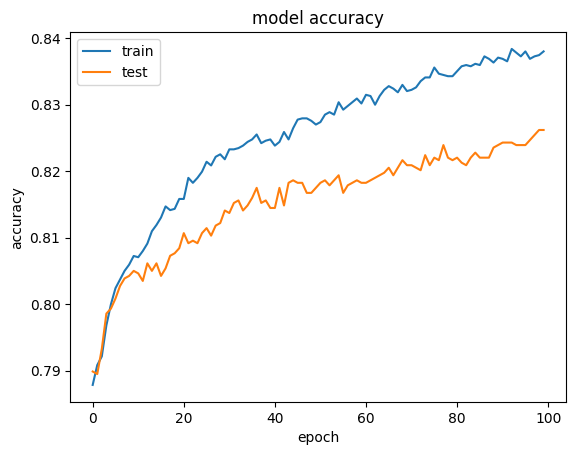

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

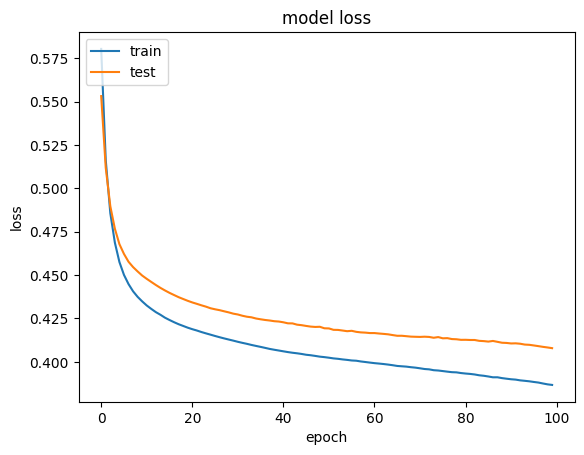

In [27]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [29]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [33]:
print("accuracy:",score*100)

accuracy: 84.25
